# Frequency Analysis for South Florida (April - June)

NB: This ipynb is a mirror of our blog post published in our [website](https://covid.dh.miami.edu/wp-admin/post.php?post=601)

In order to run this script correctly, run every one of the steps once at a time and wait that th * symbol has turned into a number.

__Authors:__

* Susanna Allés Torrent, [susanna_alles@miami.edu](mailto:susanna_alles@miami.edu), University of Miami
* Dieyun Song, [dxs1138@miami.edu](mailto:dxs1138@miami.edu), University of Miami 
* Jerry Bonnell, [j.bonnell@miami.edu](mailto:j.bonnell@miami.edu), University of Miami



Our aim is to compare and contrast the top 30 most frequent words in our Twitter English and Spanish corpora of South Florida from April 25th to June 25th, 2020. We divided it into 2 four-week periods to analyze broad trends and themes in the discourse. 


For our corpus criteria as well as for the keywords used to harvest our corpus, please refer to our blog post ["A Twitter Dataset for Digital Narratives"](https://covid.dh.miami.edu/2020/05/23/twitter-dataset-for-digital-narratives/).  As for our corpus, check our [GitHub repo](https://github.com/dh-miami/narratives_covid19/tree/master/twitter-corpus) for the ID datasets to recover tweets collections. 

## Setting up

This Jupyter notebook (ipynb) is based on [*coveet*](https://github.com/dh-miami/narratives_covid19/tree/master/scripts/freq_analysis), "a Python script that retrieves basic statistics (most frequent words, bigrams, trigrams, top users, hashtags)" written by Jerry Bonnell. Coveet allows 1) customized stopword removal, 2) top words retrieval by date, location, and language, 3) mining unique top words by location and date, 4) collocation analysis, and 5) visualization. 

First, let's set up by installing and importing libraries needed (contained in the `requirements.txt` file)

In [1]:
!pip3 install -r requirements.txt  # may need to replace "pip3" with "conda"

In [2]:
import numpy as np
import pandas as pd
from coveet import count_ngrams, uniq_vocab_by_group
from collections import Counter
from pprint import pprint
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

## Top 30 words in South Florida from April 25th to May 25th: English vs Spanish

Now let the fun begin. We'll start with querying the tweets for the first four weeks from April 25 to May 25 in South Florida in both English and Spanish.

In [5]:
## input geolocation after "-g", i.e. es, co, fl; 
## input language after "-l"; 
## input time frame after "-d". Our corpus starts on April 24, 2020.

!python3 coveet.py query -g fl -l en es -d 2020-04-25 2020-05-25 

Namespace(date=[datetime.datetime(2020, 4, 25, 0, 0), datetime.datetime(2020, 5, 25, 0, 0)], func=<function handle_query at 0x7fccb9a61550>, geo=['fl'], lang=['en', 'es'])
wrote df to dhcovid_2020-4-25_2020-5-25_en_es_fl.csv 🎉


Coveet, with the help of the `pandas` package, processes all commends in a csv file, which can be read via Excel and is downloadable and portable. In this case will be called `dhcovid_2020-4-25_2020-5-25_en_es_fl.csv` `df` stands for dataframe, which is the programming term for spreadsheet. Let's first ask the machine to process the csv file. 

In [7]:
df = pd.read_csv('dhcovid_2020-4-25_2020-5-25_en_es_fl.csv', index_col=0)

We want the dataframe to show date, text, and hashtags. "str.split" separates strings of texts into individual words. 
* A string: "have a great day"
* str.split: "have" "a" "great" "day"

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()

Before the dataset is ready for interpretation, we remove stop words, which refers to the most common words in the language that appear so frequently that bear little significance. Removing stop words makes it easier to focus on the substantive discussions and themes in the corpus. There is not a standard list of stop words in each language. A few examples of stop words include "I," "is," "and," etc.  Here are our [English](https://github.com/dh-miami/narratives_covid19/blob/master/scripts/stopwords/stopwords_en.txt) and [Spanish](https://github.com/dh-miami/narratives_covid19/blob/master/scripts/stopwords/stopwords_es.txt) stop words lists. 

In [9]:
!python3 coveet.py tidy -file dhcovid_2020-4-25_2020-5-25_en_es_fl.csv -stopwords ../stopwords/stopwords_en.txt ../stopwords/stopwords_es.txt

Namespace(file='dhcovid_2020-4-25_2020-5-25_en_es_fl.csv', func=<function handle_tidy at 0x7fdf4a5e0670>, lemmatize=False, stopwords=['../stopwords/stopwords_en.txt', '../stopwords/stopwords_es.txt'])
wrote tidied df to dhcovid_2020-4-25_2020-5-25_en_es_fl_stopworded.csv 🎉


Now let's move to retrieving the top 30 words in the English and Spanish corpora in South Florida with top ngrams.

In [10]:
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)

In [11]:
col_name = 'text'  # set to either 'text' or 'hashtags'

In [12]:
df = df.dropna(subset=[col_name])

In [13]:
# counts is of the form: location, language, actual tuples
# count_ngrams returns a (default) dictionary of word tuples (ngrams) 
# with its associated frequency; we then use Counter from python collections 
# to tell us the top n most popular ones 
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}

Here are the exact counts for each word... 

In [14]:
pprint(counts)

{('fl', 'en'): [(('covid19',), 17479),
                (('the',), 11223),
                (('to',), 10431),
                (('of',), 7637),
                (('and',), 7129),
                (('in',), 6613),
                (('a',), 6165),
                (('for',), 5895),
                (('is',), 4518),
                (('on',), 3865),
                (('with',), 3130),
                (('are',), 3011),
                (('this',), 2804),
                (('from',), 2618),
                (('you',), 2391),
                (('that',), 2275),
                (('at',), 2151),
                (('have',), 2114),
                (('be',), 2037),
                (('we',), 2009),
                (('it',), 1950),
                (('as',), 1922),
                (('i',), 1843),
                (('by',), 1789),
                (('our',), 1750),
                (('has',), 1735),
                (('during',), 1684),
                (('will',), 1641),
                (('more',), 1637),
            

To visualize the results more effectively, let's produce some bar charts with `matplotlib`.

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10  # setting figure size
plt.rcParams.update({'font.size': 10})  # setting font size

In [16]:
def plot_bar_matrix(counts, num_cols=2):
    """
    function for plotting a matrix of bar plots 
    
    counts: a dictionary mapping from a geo-lang pair identifier (generalizable to any identifier)
            to a list of (word, count) tuples containing the top word frequencies
    num_cols: desired number of columns to show in the grid
    str_func: function for "pretty printing" the title used in each of the bar charts  
    """
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0,30), width=y, color=colors, tick_label=labels) # range should equal to the # of top words you want to retrieve.
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis

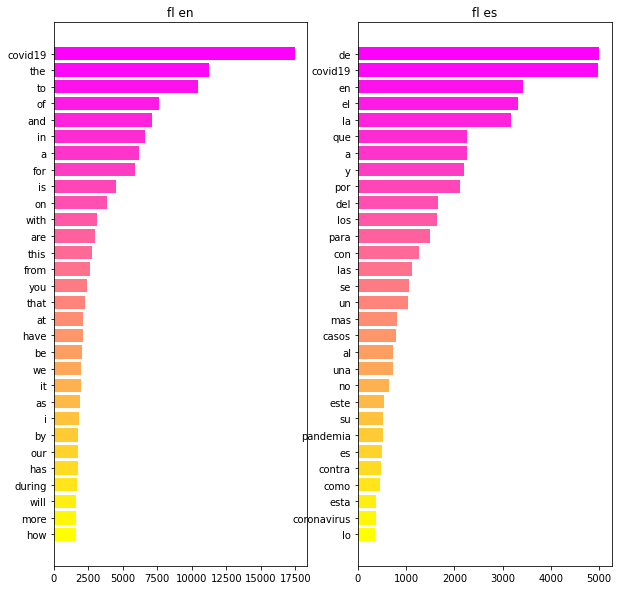

In [17]:
plot_bar_matrix(counts, num_cols = 2)

## Top 20 hashtags South Florida from April 25th to May 25th: English vs Spanish

This is the same proces but recovering the 20 most used hashtags by language in South Florida. 

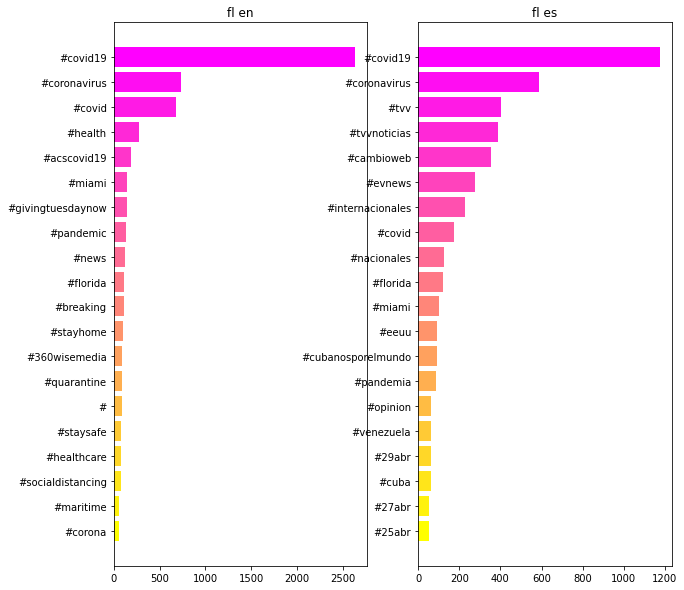

In [18]:
top_n = 20  # top 20 hashtags
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10  # setting figure size
plt.rcParams.update({'font.size': 10})  # setting font size
def plot_bar_matrix(counts, num_cols=2):
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0,20), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts)        

English and Spanish discourses in South Florida both discuss daily new cases, infected patients, deaths, testing during this global crisis. Comparing and contrasting the unique words points us to some interesting areas for further investigation.

I. The Spanish discourse seems more global. "eeuu," "Cuba," "Venezuela," and "pais" suggest that the Spanish corpus discussed the pandemic on a national and international scale. "Miami," a local term, on the other hand, is unique to the English corpus, whose top words don't include any country names. Here are a few important questions to investigate:

* Were foreign countries mentioned because of the large South Florida residents of Latin America, Cuba and Venezuela in particular, descent? 
* Did these Twitter users want to compare the situation in the US to those of other countries? 
* Why such international focus is more prominent in the Spanish corpus than the English corpus?

II. Public health measures are more prominent in the Spanish corpus. "Cuarentena" and "vacuna" shows that the discussions of quarantine policies and vaccine take a significant weight in Spanish-languaged tweets, which neither is discussed in the English corpus. How shall we explain this distinction?

III. The English corpus seems to be more "interactive." "Help," "need," "support," and "please" suggest a call for action from another individual, and are unique to the English corpus. These words imply that the English tweets have a stronger intention to interact with readers and influence others' behaviors. With further concordance analysis, here are a few questions that come to mind:

* To whom are these actions directed? Government agencies, the audience at large, hospitals, etc.?
* Are these demands for others, i.e. "people need to wear masks," or calls for assistance for oneself, i.e. "my family needs support due to unemployment"? 
* Which topical area did these words mostly appear in, economics, medical, political, personal, etc?

IV. "Business" and "work" are unique to the English corpus. Does it indicate more discussions about the economic effects of the pandemic?

V. Since "gobierno" is unique to the Spanish corpus, how prominent is government-related discussions in Spanish tweets? Does the English corpus discuss government, at all? How do they differ?

###### It is also an interesting question to see how many tweets are produced in both different languages. [ASK DATABASE] ######

## Top 30 words in South Florida from May 25th to June 25th: English vs Spanish

Now we are going to repeat the same process for the second period.

Namespace(date=[datetime.datetime(2020, 5, 25, 0, 0), datetime.datetime(2020, 6, 25, 0, 0)], func=<function handle_query at 0x7f3a7ea06550>, geo=['fl'], lang=['en', 'es'])
wrote df to dhcovid_2020-5-25_2020-6-25_en_es_fl.csv 🎉
Namespace(file='dhcovid_2020-5-25_2020-6-25_en_es_fl.csv', func=<function handle_tidy at 0x7fadcced9670>, lemmatize=False, stopwords=['../stopwords/stopwords_en.txt', '../stopwords/stopwords_es.txt'])
wrote tidied df to dhcovid_2020-5-25_2020-6-25_en_es_fl_stopworded.csv 🎉


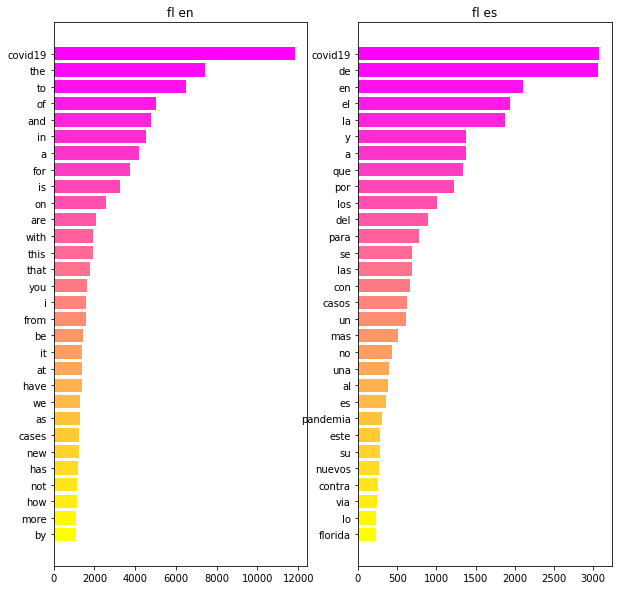

In [19]:
!python3 coveet.py query -g fl -l en es -d 2020-05-25 2020-06-25
df = pd.read_csv('dhcovid_2020-5-25_2020-6-25_en_es_fl.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
!python3 coveet.py tidy -file dhcovid_2020-5-25_2020-6-25_en_es_fl.csv -stopwords ../stopwords/stopwords_en.txt ../stopwords/stopwords_es.txt
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10  # setting figure size
plt.rcParams.update({'font.size': 10})  # setting font size
def plot_bar_matrix(counts, num_cols=2):
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0,30), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts)

## Top 20 hashtags South Florida from May 25th to June 25th: English vs Spanish

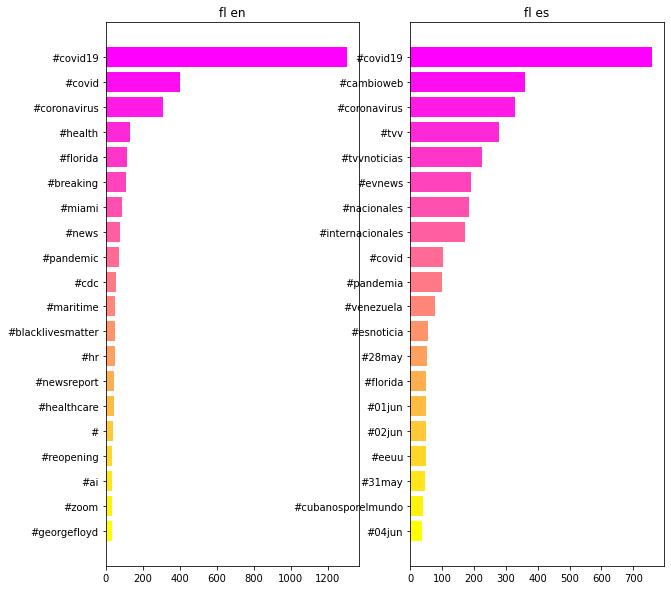

In [20]:
top_n = 20  # top 20 hashtags
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10  # setting figure size
plt.rcParams.update({'font.size': 10})  # setting font size
def plot_bar_matrix(counts, num_cols=2):
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0,20), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts)        

Let's first look at the common top words. With cases/casos and new/nuevo rising to top two, we can speculate more discussions about the increasing number of cases in South Florida after late May. "Miami" shows up in both English and Spanish corpora, indicating more attention paid to this area by Spanish-language Twitter users. 

The list of unique words further reveals some patterns and research questions. 

I. The Spanish corpus remains more "global." Venezuela and Cuba are again hot topics among the Spanish-speaking population, but this time Venezuela appears first, with Brazil added to the list and China disappeared. 

"Masks" is (finally) a top word in the English corpus. This aligns with various states' mandatory mask policies, calls for responsible protesting during the Black Lives Matter movement, and reflects an improved public awareness of responsible preventive measures.

###### SAT: Dieyun, can you add the script to recover the common top hashtag and the unique top hashtags here??

###### Dieyun: I don't think there's a common hashtag/words retrieval function yet? I didn't find it on the script. 

## Unique word and hashtag by date

We may be interested in retrieving words that are unique with respect to a given date. For instance, during the week of May 8, we may be interested in the words that occurred only on May 8, on May 9, and so on. This can help us understand trends in Twitter discourse.

This function is best suited for studies on individual countries, e.g., the unique words by date in `fl-en`. For the interest of time, we'll use the English and Spanish corpora of the week of `May 24 to May 30`, the week of George Floyd's death, to demonstrate this function.

First, we need to prepare a query CSV with the contents of fl-en only. Remember that coveet is general and will work with whatever data is present in the CSV.

In [52]:
!python3 coveet.py query -g fl -l en -d 2020-05-24 2020-05-30

Namespace(date=[datetime.datetime(2020, 5, 24, 0, 0), datetime.datetime(2020, 5, 30, 0, 0)], func=<function handle_query at 0x7fd164b90550>, geo=['fl'], lang=['en'])
wrote df to dhcovid_2020-5-24_2020-5-30_en_fl.csv 🎉


As before, we need to tidy up the query CSV and remove stop words. 

In [71]:
!python3 coveet.py tidy -file dhcovid_2020-5-24_2020-5-30_en_fl.csv -stopwords ../stopwords/stopwords_en.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-5-24_2020-5-30_en_fl.csv', func=<function handle_tidy at 0x7f8c182a1670>, lemmatize=False, stopwords=['../stopwords/stopwords_en.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-5-24_2020-5-30_en_fl_stopworded.csv 🎉


We read in the tidy CSV into a pandas data frame and do the usual pandas preprocessing work.

In [111]:
col_name = "text" # Jerry: added this for clarity
top_n = 10  # top 20 hashtags
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)

In [112]:
df = pd.read_csv('dhcovid_2020-5-24_2020-5-30_en_fl_stopworded.csv')
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
df = df.dropna(subset=[col_name])  # Jerry: needed to add this line, as there are rows where the hashtag field is empty; this drops those rows

We prepare the unique vocabulary dictionary as we did earlier, and then obtain `counts`.

In [123]:
grouping = df.groupby([pd.Grouper(key='date', freq='D'), "geo", "lang"])[col_name]  # D or W-MON
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
# recall that col_name is a toggle variable set earlier in the notebook ("text" or "hashtags")
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['date'], x["geo"], x["lang"])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic    

In [124]:
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping }

In [125]:
pprint(counts)

{(Timestamp('2020-05-24 00:00:00', freq='D'), 'fl', 'en'): [(('cardiologist',),
                                                             3),
                                                            (('barkley',), 3),
                                                            (('kiwanis',), 3),
                                                            (('distributedand',),
                                                             3),
                                                            (('6000',), 3),
                                                            (('somewhere',), 3),
                                                            (('jamaica',), 3),
                                                            (('capitalism',),
                                                             3),
                                                            (('triggatrehrnfrom438',),
                                                             3),
                   

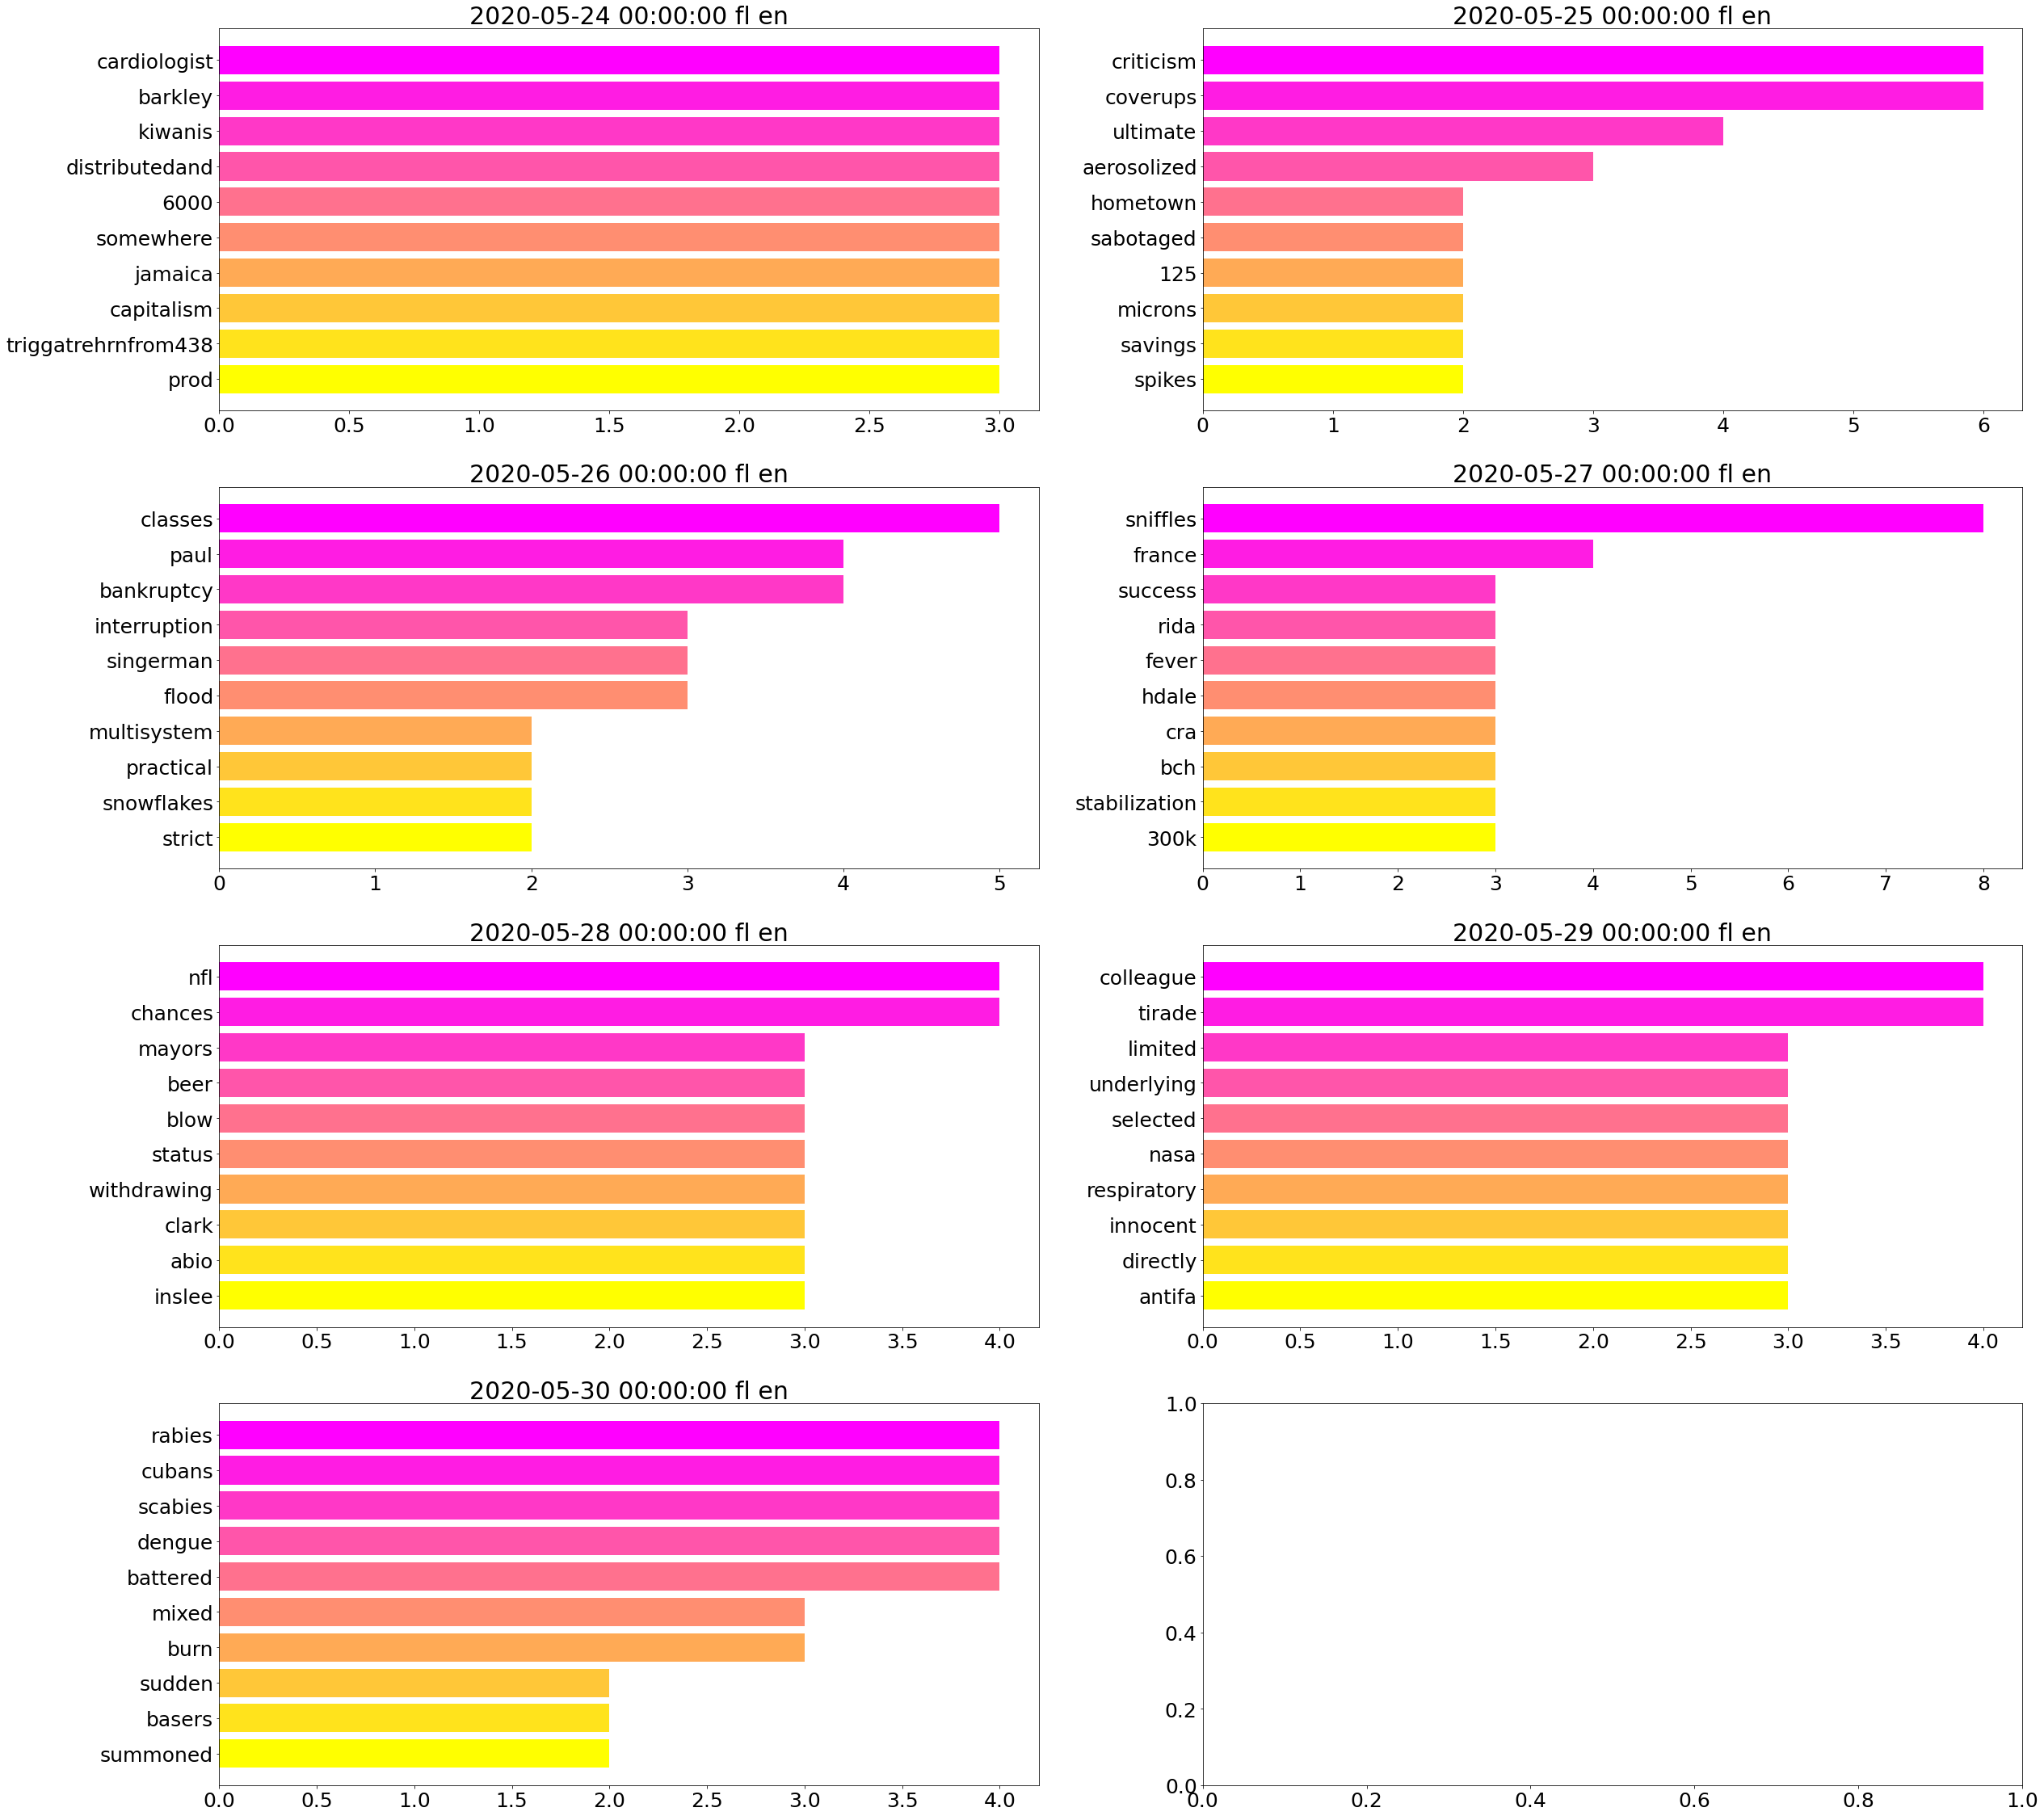

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 25})  # setting font size
def plot_bar_matrix(counts, num_cols=2):
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0,10), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts)    

We'll now repeat the steps for the Spanish corpus.

In [100]:
!python3 coveet.py query -g fl -l es -d 2020-05-24 2020-05-30

Namespace(date=[datetime.datetime(2020, 5, 24, 0, 0), datetime.datetime(2020, 5, 30, 0, 0)], func=<function handle_query at 0x7f31c744f550>, geo=['fl'], lang=['es'])
wrote df to dhcovid_2020-5-24_2020-5-30_es_fl.csv 🎉


In [128]:
!python3 coveet.py tidy -file dhcovid_2020-5-24_2020-5-30_es_fl.csv -stopwords ../stopwords/stopwords_es.txt ../stopwords/stopwords_hashtags.txt
col_name = "text"
df = pd.read_csv('dhcovid_2020-5-24_2020-5-30_es_fl_stopworded.csv')
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
df = df.dropna(subset=[col_name])
grouping = df.groupby([pd.Grouper(key='date', freq='D'), "geo", "lang"])[col_name]  # D or W-MON
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
# recall that col_name is a toggle variable set earlier in the notebook ("text" or "hashtags")
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['date'], x["geo"], x["lang"])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 25})  # setting font size
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping }
pprint(counts)

Namespace(file='dhcovid_2020-5-24_2020-5-30_es_fl.csv', func=<function handle_tidy at 0x7fd49807c5e0>, lemmatize=False, stopwords=['../stopwords/stopwords_es.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-5-24_2020-5-30_es_fl_stopworded.csv 🎉
{(Timestamp('2020-05-24 00:00:00', freq='D'), 'fl', 'es'): [(('1100',), 5),
                                                            (('britanica',), 4),
                                                            (('anti',), 4),
                                                            (('aplicara',), 4),
                                                            (('111',), 3),
                                                            (('aumentaron',),
                                                             3),
                                                            (('ingresados',),
                                                             3),
                                                    

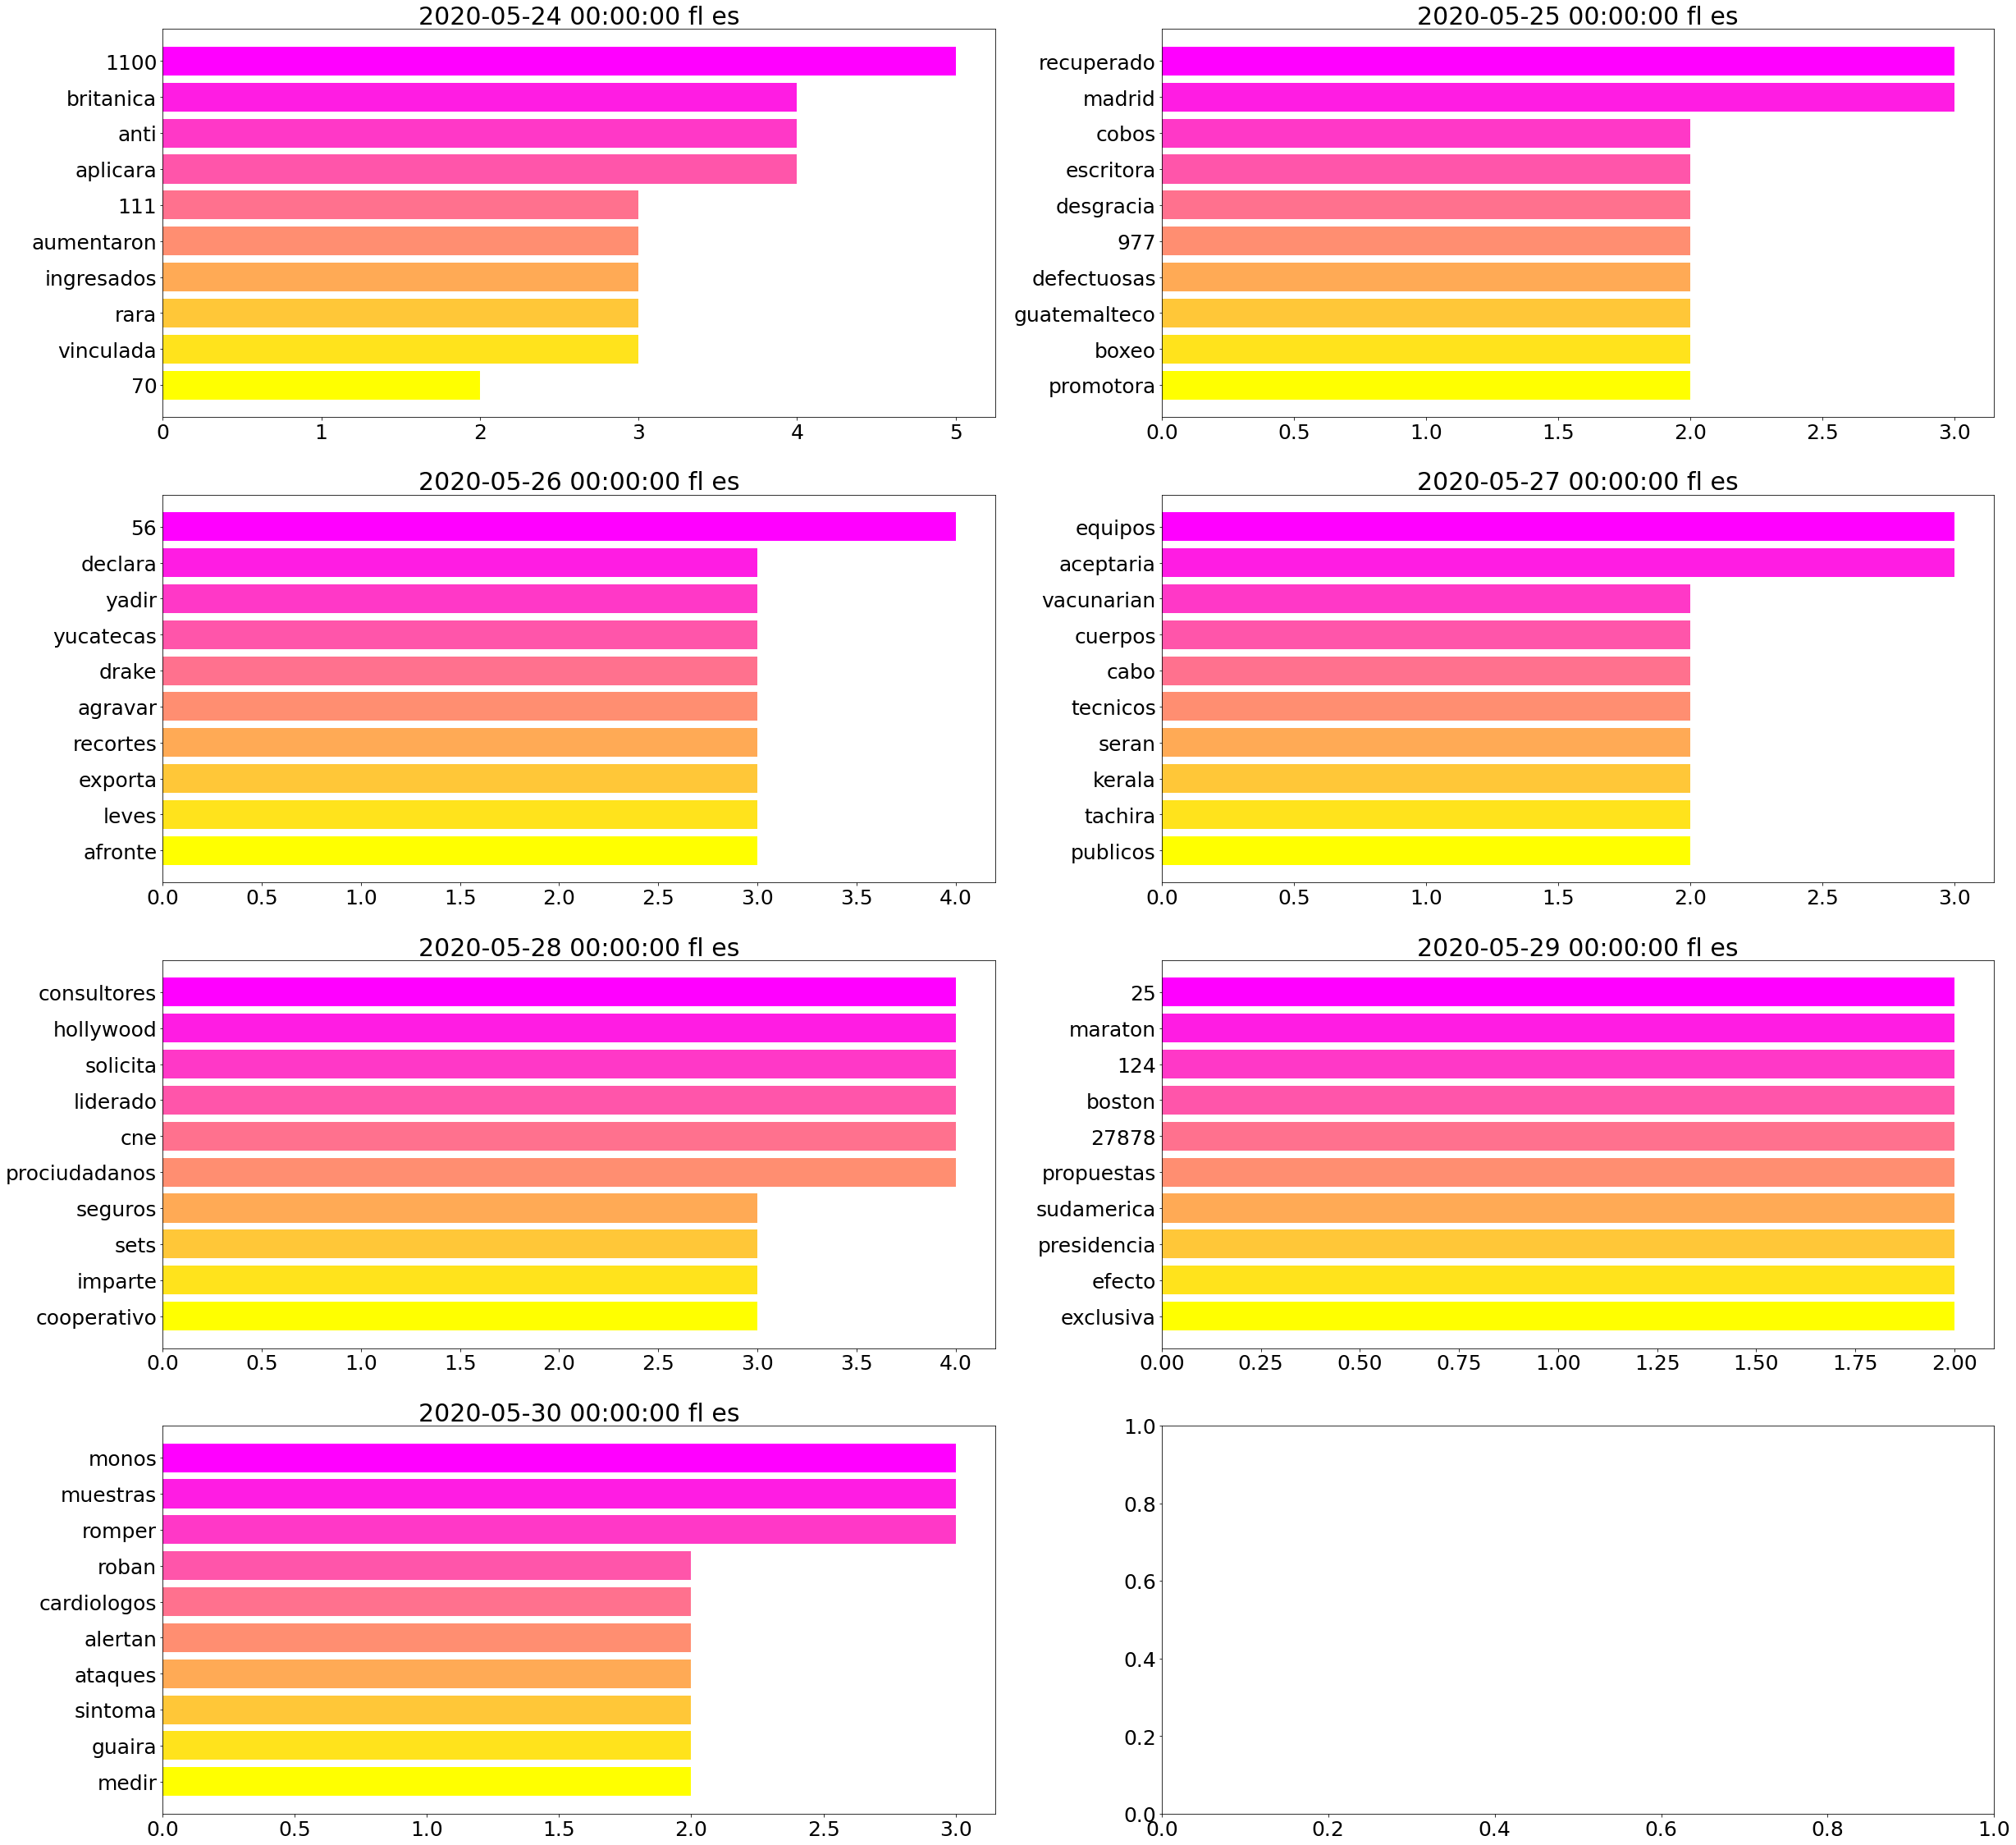

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 25})  # setting font size
def plot_bar_matrix(counts, num_cols=2):
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0,10), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts, num_cols = 2)